In [1]:
from preamble import *

from pyomo.environ import *
# optimizers ipopt and coincbc executables downloaded for win64, unzip and add folders to system path variable

MAXIMIZE = -1
MINIMIZE = 1

# 2. Linear Programming

## 2.1. Production Models with Linear Constraints

### 2.1.2. Example: Production plan for a single product plant

Suppose you are thinking about starting up a business to produce Product X. You have determined there is a market for X of up to 40 units per week at a price of USD 270 each. The production of each unit requires USD 100 of raw materials, 1 hour of type A labor, and 2 hours of type B labor. You have an unlimited amount of raw material available to you, but only 80 hours per week of labor A at a cost of USD 50/hour, and 100 hours per week of labor B at a cost of USD 40 per hour. Ignoring all other expenses, what is the maximum weekly profit?

In [2]:
model = ConcreteModel()

# declare decision variables
model.x = Var(domain = NonNegativeIntegers)

# declare objective
model.profit = Objective(
    expr = 40*model.x,
    sense = MAXIMIZE)

# declare constraints
model.demand = Constraint(expr = model.x <= 40)
model.laborA = Constraint(expr = model.x <= 80)
model.laborB = Constraint(expr = model.x <= 100)

SolverFactory('cbc').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 1600.0
  Upper bound: 1600.0
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Number of binary variables: 0
  Number of integer variables: 1
  Number of nonzeros: 0
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
  

In [3]:
model.profit.display()
model.x.display()

profit : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True : 1600.0
x : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :  40.0 :  None : False : False : NonNegativeIntegers


In [4]:
print(f"Profit = {model.profit()} per week")
print(f"X = {model.x()} units per week")

Profit = 1600.0 per week
X = 40.0 units per week


### 2.1.3. Production plan: Product Y
Your marketing department has developed plans for a new product called Y. The product sells at a price of USD 210/each, and they expect that you can sell all that you can make. It’s also cheaper to make, requiring only USD 90 in raw materials, 1 hour of Labor type A at USD 50 per hour, and 1 hour of Labor B at USD 40 per hour. What is the potential weekly profit?

$$
\text{cost} = 90x + 50x + 40x = 180x\\
\text{profit} = 210x - 180x = 30x
$$

In [5]:
model = ConcreteModel()

# declare decision variables
model.y = Var(domain = NonNegativeIntegers)

# declare objective
model.profit = Objective(
    expr = 30*model.y,
    sense = MAXIMIZE)

# declare constraints
model.laborA = Constraint(expr = model.y <= 80)
model.laborB = Constraint(expr = model.y <= 100)

SolverFactory('cbc').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 2400.0
  Upper bound: 2400.0
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Number of binary variables: 0
  Number of integer variables: 1
  Number of nonzeros: 0
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.01
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
 

In [6]:
print(f"Profit = {model.profit()} per week")
print(f"Y = {model.y()} units per week")

Profit = 2400.0 per week
Y = 80.0 units per week


### 2.1.4. Production plan: Mixed product strategy
So far we have learned that we can make 1,600 per week by manufacturing product X, and 2,400 per week manufacturing product Y. Is it possible to do even better?

To answer this question, we consider the possibilty of manufacturing both products in the same plant. The marketing department assures us that product Y will not affect the sales of product X. So the same constraints hold as before, but now we have two decision variables,  and .

In [7]:
model = ConcreteModel()

# declare decision variables
model.x = Var(domain=NonNegativeIntegers)
model.y = Var(domain=NonNegativeIntegers)

# declare objective
model.profit = Objective(
    expr = 40*model.x + 30*model.y,
    sense = MAXIMIZE)

# declare constraints
model.demand = Constraint(expr = model.x <= 40)
model.laborA = Constraint(expr = model.x + model.y <= 80)
model.laborB = Constraint(expr = 2*model.x + model.y <= 100)

# solve
SolverFactory('cbc').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 2600.0
  Upper bound: 2600.0
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 2
  Number of binary variables: 0
  Number of integer variables: 2
  Number of nonzeros: 2
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.01
  Wallclock time: 0.01
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 


In [8]:
# display solution
print(f"Profit = {model.profit()}")
print(f"Units of X = {model.x()}")
print(f"Units of Y = {model.y()}")

Profit = 2600.0
Units of X = 20.0
Units of Y = 60.0


### 2.1.5. What are the active constraints?

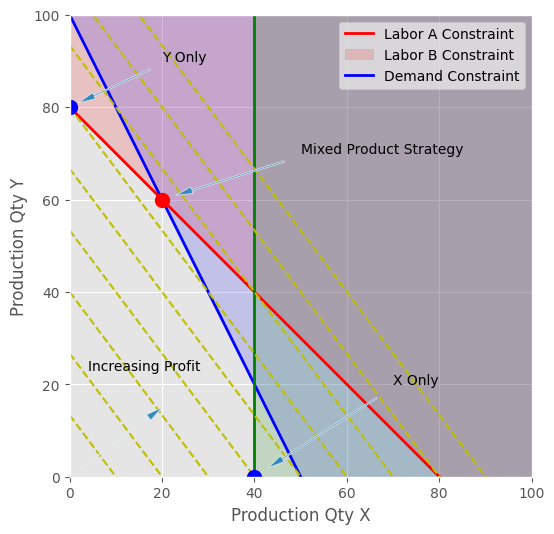

In [9]:
plt.figure(figsize=(6, 6))
plt.subplot(111, aspect='equal')
plt.axis([0, 100, 0, 100])
plt.xlabel('Production Qty X')
plt.ylabel('Production Qty Y')

# Labor A constraint
x = np.array([0, 80])
y = 80 - x
plt.plot(x, y, 'r', lw=2)
plt.fill_between([0, 80, 100], [80, 0,0 ], [100, 100, 100], color='r', alpha=0.15)

# Labor B constraint
x = np.array([0, 50])
y = 100 - 2*x
plt.plot(x, y, 'b', lw=2)
plt.fill_between([0, 50, 100], [100, 0, 0], [100, 100, 100], color='b', alpha=0.15)

# Demand constraint
plt.plot([40, 40], [0, 100], 'g', lw=2)
plt.fill_between([40, 100], [0, 0], [100, 100], color='g', alpha=0.15)

plt.legend(['Labor A Constraint', 'Labor B Constraint', 'Demand Constraint'])

# Contours of constant profit
x = np.array([0, 100])
for p in np.linspace(0, 3600, 10):
    y = (p - 40*x)/30
    plt.plot(x, y, 'y--')

# Optimum
plt.plot(20, 60, 'r.', ms=20)
plt.annotate('Mixed Product Strategy', xy=(20, 60), xytext=(50, 70), 
             arrowprops=dict(shrink=.1, width=1, headwidth=5))

plt.plot(0, 80, 'b.', ms=20)
plt.annotate('Y Only', xy=(0, 80), xytext=(20, 90), 
             arrowprops=dict(shrink=0.1, width=1, headwidth=5))

plt.plot(40, 0, 'b.', ms=20)
plt.annotate('X Only', xy=(40, 0), xytext=(70, 20), 
             arrowprops=dict(shrink=0.1, width=1, headwidth=5))

plt.text(4, 23, 'Increasing Profit')
_= plt.annotate('', xy=(20,15), xytext=(0,0), 
             arrowprops=dict(width=0.5,headwidth=5))

## 2.2. Production Model Sensitivity Analysis

### 2.2.4. Sensitivity Analysis

Sensitivity analysis is the process of determining how the solution to a linear programming problem (or for that matter, any optimization problem) depends on parameter values. This can lead to important insights. In this toy application, for example, sensitivity analysis will reveal the extra profit obtained by adding additional hours of labor. For many applications, the information obtained from sensitivity analysis can be the primary reason to create the linear program.

For the general case, assume that the linear program can be written in the form:

\begin{align}
P = \text{max} \, c^T x\\ \\
\text{subject to:}\\
Ax \le b \\
x \ge 0
\end{align}

[Source](https://jckantor.github.io/ND-Pyomo-Cookbook/notebooks/02.02-Production-Model-Sensitivity-Analysis.html)

In [10]:
A_augment = np.array([[1, 0], [1, 1], [2, 1], [-1, 0], [0, -1]])
b_augment = np.array([[40], [80], [100], [0], [0]])
c = np.array([40, 30])

print(f"\nA = {A_augment}")
print(f"\nb = {b_augment}")
print(f"\nc = {c}")

active_constraints = [1, 2]

A_active = A_augment[active_constraints, :]
b_active = b_augment[active_constraints, :]

x = np.dot(np.linalg.inv(A_active), b_active)
print(f"\nx = {x}")

P = np.dot(c, x)
print(f"\nP = {P}")

y = np.dot(c, np.linalg.inv(A_active))
print(f"\ny = {y}")


A = [[ 1  0]
 [ 1  1]
 [ 2  1]
 [-1  0]
 [ 0 -1]]

b = [[ 40]
 [ 80]
 [100]
 [  0]
 [  0]]

c = [40 30]

x = [[20.]
 [60.]]

P = [2600.]

y = [20. 10.]


In [11]:
# Adjoint Sensitivity
np.linalg.solve(A_active.T, c)

array([20., 10.])

### 2.2.6 Accesing sensitivity coefficients in Pyomo

In [12]:
model = ConcreteModel()

# for access to dual solution for constraints
model.dual = Suffix(direction=Suffix.IMPORT)

# declare decision variables
model.x = Var(domain=NonNegativeIntegers)
model.y = Var(domain=NonNegativeIntegers)

# declare objective
model.profit = Objective(
    expr = 40*model.x + 30*model.y,
    sense = maximize)

# declare constraints
model.demand = Constraint(expr = model.x <= 40)
model.laborA = Constraint(expr = model.x + model.y <= 80)
model.laborB = Constraint(expr = 2*model.x + model.y <= 100)

# solve
SolverFactory('cbc').solve(model)

print("\nSolution")
print(f"x = {model.x()}")
print(f"y = {model.y()}")

print("\nSensitivity Analysis")
print(f"y_demand = {-model.dual[model.demand]}")
print(f"y_laborA = {-model.dual[model.laborA]}")
print(f"y_laborB = {-model.dual[model.laborB]}")


Solution
x = 20.0
y = 60.0

Sensitivity Analysis
y_demand = 0.0
y_laborA = 0.0
y_laborB = 0.0


In [13]:
str = "   {0:7.2f} {1:7.2f} {2:7.2f} {3:7.2f}"

print("Constraint  value  lslack  uslack    dual")
for c in [model.demand, model.laborA, model.laborB]:
    print(c, str.format(c(), c.lslack(), c.uslack(), model.dual[c]))

Constraint  value  lslack  uslack    dual
demand      20.00     inf   20.00   -0.00
laborA      80.00     inf    0.00   -0.00
laborB     100.00     inf    0.00   -0.00


### 2.2.7. Theory of constraints
- For decisions you should expect to find $n$ ‘active’ constraints.
- Each inactive constraint has an associated ‘slack.’ The associated resources have no incremental value.
- Each active constraint has an associated ‘shadow price’. This is additional value of additional resources.

## 2.3 Linear Blending Problem

### 2.3.2. Problem Statement
A brewery receives an order for 100 gallons of 4% ABV (alchohol by volume) beer. The brewery has on hand beer A that is 4.5% ABV that cost USD 0.32 per gallon to make, and beer B that is 3.7% ABV and cost USD 0.25 per gallon. Water could also be used as a blending agent at a cost of USD 0.05 per gallon. Find the minimum cost blend that meets the customer requirements.

### 2.3.3. Representing Problem Data as a Python Dictionary
We will use this problem as an opportunity to write a Python function that accepts data on raw materials and customer specifications to produce the lowest cost blend.

The first step is to represent the problem data in a generic manner that could, if needed, be extended to include additional blending components. Here we use a dictionary of materials, each key denoting a blending agent. For each key there is a sub-dictionary containing attributes of each blending component.

In [14]:
data = {
    'A': {'abv': 0.047, 'cost': 0.32},
    'B': {'abv': 0.037, 'cost': 0.25},
    'W': {'abv': 0.0, 'cost': 0.05},
    }

In [15]:
vol = 100.
abv = 0.04

def beer_blend(vol, abv, data):
    C = data.keys()
    model = ConcreteModel()
    model.x = Var(C, domain=NonNegativeReals)
    model.cost = Objective(expr = sum(model.x[c]*data[c]['cost'] for c in C))
    model.vol = Constraint(expr = vol == sum(model.x[c] for c in C))
    model.abv = Constraint(expr = 0 == sum(model.x[c]*(data[c]['abv'] - abv) for c in C))

    solver = SolverFactory('cbc')
    solver.solve(model)

    print('Optimal Blend')
    for c in data.keys():
        print('  ', c, ':', model.x[c](), 'gallons')
    print()
    print('Volume = ', model.vol(), 'gallons')
    print('Cost = $', model.cost())
    
beer_blend(vol, abv, data)

Optimal Blend
   A : 30.0 gallons
   B : 70.0 gallons
   W : 0.0 gallons

Volume =  100.0 gallons
Cost = $ 27.1
